In [196]:
install.packages("ISLR")
library(ISLR)
library(tidyverse)

#10a)
summary(Weekly)
head(Weekly)
Weekly$Direction <- as.numeric(Weekly$Direction)
cor(Weekly)

Warning message:
"package 'ISLR' is in use and will not be installed"


      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,1
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,1
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,2
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,2
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,2
6,1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,1


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894,-0.02220025
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842,-0.05000380
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717,0.07269634
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639,-0.02291281
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873,-0.02054946
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698,-0.01816827
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783,-0.01799521
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000,0.72002470
Direction,-0.02220025,-0.050003804,0.07269634,-0.02291281,-0.020549456,-0.018168272,-0.01799521,0.720024704,1.00000000


There seems to be a strong correlation between Volume & Year (0.84) and Direction & Today (0.72). The other correlations are small. 

In [197]:
"10b"
Weekly$Direction <- as.factor(Weekly$Direction)
glm_b <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Weekly, family=binomial)
summary(glm_b)

[1] "10b"


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Lag2 is the only significant predictor.

In [198]:
"10c"
glm.probs = predict(glm_b,type = "response")
contrasts(Weekly$Direction)
glm.pred = rep("1", length(glm.probs))
glm.pred[glm.probs > .5] = "2"
table(glm.pred, Weekly$Direction)
mean(glm.pred==Weekly$Direction)

[1] "10c"

,2
1,0
2,1


        
glm.pred   1   2
       1  54  48
       2 430 557

[1] 0.5610652

The confusion matrix shows us how many observations were classified correctely and falsely. Here 611 observations were classified correctly and 478 observations were classified falsely. 56% of the overall observations are classified correctly. For "Up" 92% (48/(48+557)=0.92) of the observations were classified correctly and for "Down" 11% of the observations were classified correctly (54/(54+430)=0.112).

In [199]:
"10d"
train = (Weekly$Year<2009)
Weekly.0910 = Weekly[!train,]
dim(Weekly.0910)
Direction.0910=Weekly$Direction[!train]
glm.fit = glm(Direction~Lag2, data=Weekly, family=binomial,subset=train)
glm.probs = predict(glm.fit, Weekly.0910,type="response")
glm.pred = rep("1", length(glm.probs))
glm.pred[glm.probs>.5] = "2"
table(glm.pred, Direction.0910)
mean(glm.pred == Direction.0910)



[1] "10d"

[1] 104   9

        Direction.0910
glm.pred  1  2
       1  9  5
       2 34 56

[1] 0.625

In [200]:
"10e"
install.packages("MASS")
library(MASS)
lda.fit = lda(Direction~Lag2, data=Weekly,subset=train)
lda.pred = predict(lda.fit, Weekly.0910)
table(lda.pred$class, Direction.0910)
mean(lda.pred$class == Direction.0910)

[1] "10e"

Warning message:
"package 'MASS' is in use and will not be installed"


   Direction.0910
     1  2
  1  9  5
  2 34 56

[1] 0.625

In [201]:
"10f"
qda.fit = qda(Direction~Lag2, data=Weekly,subset=train)
qda.pred = predict(qda.fit, Weekly.0910)
table(qda.pred$class, Direction.0910)
mean(qda.pred$class == Direction.0910)

[1] "10f"

   Direction.0910
     1  2
  1  0  0
  2 43 61

[1] 0.5865385

In [202]:
"10g"
install.packages("class")
library(class)
train.X = as.matrix(Weekly$Lag2[train])
test.X = as.matrix(Weekly$Lag2[!train])
train.Direction = Weekly$Direction[train]
set.seed(1)
knn.pred = knn(train.X, test.X, train.Direction, k=1)
table(knn.pred, Direction.0910)
mean(knn.pred==Direction.0910)

[1] "10g"

Warning message:
"package 'class' is in use and will not be installed"


        Direction.0910
knn.pred  1  2
       1 21 30
       2 22 31

[1] 0.5

"10h"
LDA and logistic regression both have the best percentage of overall correct classified observations (62.5%). 

In [203]:
"10i"
"logistic regression with interaction and main effects Lag1 & Lag2"
glm.fit = glm(Direction~Lag2*Lag1, data=Weekly, family=binomial,subset=train)
glm.probs = predict(glm.fit, Weekly.0910,type="response")
glm.pred = rep("1", length(glm.probs))
glm.pred[glm.probs>.5] = "2"
table(glm.pred, Direction.0910)
mean(glm.pred == Direction.0910)

"Logistic regression with interaction and main effect Lag1, Lag2 & squared Lag3"
glm.fit = glm(Direction~Lag1*Lag2*I(Lag3^2), data=Weekly, family=binomial,subset=train)
glm.probs = predict(glm.fit, Weekly.0910,type="response")
glm.pred = rep("1", length(glm.probs))
glm.pred[glm.probs>.5] = "2"
table(glm.pred, Direction.0910)
mean(glm.pred == Direction.0910)

"LDA Lag1 & squared Lag4"
lda.fit = lda(Direction~Lag2*I(Lag4^2), data=Weekly,subset=train)
lda.pred = predict(lda.fit, Weekly.0910)
table(lda.pred$class, Direction.0910)
mean(lda.pred$class == Direction.0910)

"LDA Lag1 & Lag2 & Year"
lda.fit = lda(Direction~Lag2*Lag1*Year, data=Weekly,subset=train)
lda.pred = predict(lda.fit, Weekly.0910)
table(lda.pred$class, Direction.0910)
mean(lda.pred$class == Direction.0910)

"QDA Lag1 & Lag2"
qda.fit = qda(Direction~Lag2*Lag1, data=Weekly, subset=train)
qda.class = predict(qda.fit, Weekly.0910)$class
table(qda.class, Direction.0910)
mean(qda.class == Direction.0910)

"QDA Lag1 & Lag2 & Volume"
qda.fit = qda(Direction~Lag2*Volume, data=Weekly, subset=train)
qda.class = predict(qda.fit, Weekly.0910)$class
table(qda.class, Direction.0910)
mean(qda.class == Direction.0910)

"QDA absLag2"
qda.fit = qda(Direction~sqrt(abs(Lag2)), data=Weekly, subset=train)
qda.class = predict(qda.fit, Weekly.0910)$class
table(qda.class, Direction.0910)
mean(qda.class == Direction.0910)

"KNN k=10"
knn.pred = knn(train.X, test.X, train.Direction, k=10)
table(knn.pred, Direction.0910)
mean(knn.pred == Direction.0910)

"KNN k=100"
knn.pred = knn(train.X, test.X, train.Direction, k=100)
table(knn.pred, Direction.0910)
mean(knn.pred == Direction.0910)

"KNN k=200"
knn.pred = knn(train.X, test.X, train.Direction, k=200)
table(knn.pred, Direction.0910)
mean(knn.pred == Direction.0910)

[1] "10i"

[1] "logistic regression with interaction and main effects Lag1 & Lag2"

        Direction.0910
glm.pred  1  2
       1  7  8
       2 36 53

[1] 0.5769231

[1] "Logistic regression with interaction and main effect Lag1, Lag2 & squared Lag3"

        Direction.0910
glm.pred  1  2
       1  6  7
       2 37 54

[1] 0.5769231

[1] "LDA Lag1 & squared Lag4"

   Direction.0910
     1  2
  1  8  5
  2 35 56

[1] 0.6153846

[1] "LDA Lag1 & Lag2 & Year"

   Direction.0910
     1  2
  1 13 16
  2 30 45

[1] 0.5576923

[1] "QDA Lag1 & Lag2"

         Direction.0910
qda.class  1  2
        1 23 36
        2 20 25

[1] 0.4615385

[1] "QDA Lag1 & Lag2 & Volume"

         Direction.0910
qda.class  1  2
        1 37 49
        2  6 12

[1] 0.4711538

[1] "QDA absLag2"

         Direction.0910
qda.class  1  2
        1  0  0
        2 43 61

[1] 0.5865385

[1] "KNN k=10"

        Direction.0910
knn.pred  1  2
       1 17 18
       2 26 43

[1] 0.5769231

[1] "KNN k=100"

        Direction.0910
knn.pred  1  2
       1  9 12
       2 34 49

[1] 0.5576923

[1] "KNN k=200"

        Direction.0910
knn.pred  1  2
       1  3  0
       2 40 61

[1] 0.6153846

logistic regression: the model with interaction and main effects of Lag1 & Lag2 and the model with interaction and main effects Lag1, Lag2 & squared Lag3 have the same percentage of correctly classified observations (57.7%)
LDA: the model with the interactions and main effects of Lag1 and squared Lag4 (61.5%) has a higher percentage of correctly classified observations than the model with the interactions and main effects Lag1 & Lag2 & Year (55.8%)
QDA: The model with the rooted Lag2 (58.7%) has a higher percentage of correctly classified observations than the model with the interactions and main effects of Lag1 & Lag2 & Volume (46.2%).
KNN: the model with k=200 has the best percentage of correctly classified observations (61.5%), then the model with k=10 (57.7%) and then the model with k=100 (55.8%), All the KNN models use Lag2 as a predictor.

Overall the models with the highest percentage of correctly classified observations are the LDA model with the interactions and main effects of Lag1 and squared Lag4 and the KNN model with the main effect of Lag2 and k=200 (both 61.5%).

In [204]:
"11a"
summary(Auto)
head(Auto)
attach(Auto)
mpg01 = rep(0, length(mpg))
mpg01[mpg>median(mpg)] = 1
Auto_a = data.frame(Auto, mpg01)
Auto_a

[1] "11a"

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01,mpg01.1,mpg01.2,mpg01.3,mpg01.4,mpg01.5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0,0,0,0,0,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0,0,0,0,0,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0,0,0,0,0,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0,0,0,0,0,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0,0,0,0,0,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0,0,0,0,0,0


The following object is masked _by_ .GlobalEnv:

    mpg01


The following objects are masked from Auto (pos = 3):

    acceleration, cylinders, displacement, horsepower, mpg, mpg01,
    mpg01.1, mpg01.2, mpg01.3, mpg01.4, mpg01.5, name, origin, weight,
    year


The following objects are masked from Auto (pos = 4):

    acceleration, cylinders, displacement, horsepower, mpg, mpg01,
    mpg01.1, mpg01.2, mpg01.3, mpg01.4, mpg01.5, name, origin, weight,
    year


The following objects are masked from Auto (pos = 5):

    acceleration, cylinders, displacement, horsepower, mpg, mpg01,
    mpg01.1, mpg01.2, mpg01.3, mpg01.4, mpg01.5, name, origin, weight,
    year


The following objects are masked from Auto (pos = 6):

    acceleration, cylinders, displacement, horsepower, mpg, mpg01,
    mpg01.1, mpg01.2, mpg01.3, mpg01.4, mpg01.5, name, origin, weight,
    year


The following objects are masked from Auto (pos = 7):

    acceleration, cylinders, displacement, horsepower, mpg, mpg01,
 

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01,mpg01.1,mpg01.2,mpg01.3,mpg01.4,mpg01.5,mpg01.6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0,0,0,0,0,0,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0,0,0,0,0,0,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0,0,0,0,0,0,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0,0,0,0,0,0,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0,0,0,0,0,0,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0,0,0,0,0,0,0
7,14,8,454,220,4354,9.0,70,1,chevrolet impala,0,0,0,0,0,0,0
8,14,8,440,215,4312,8.5,70,1,plymouth fury iii,0,0,0,0,0,0,0
9,14,8,455,225,4425,10.0,70,1,pontiac catalina,0,0,0,0,0,0,0


[1] "11b"

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01,mpg01.1,mpg01.2,mpg01.3,mpg01.4,mpg01.5,mpg01.6
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088,0.8369392,0.8369392,0.8369392,0.8369392,0.8369392,0.8369392,0.8369392
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316,-0.7591939,-0.7591939,-0.7591939,-0.7591939,-0.7591939,-0.7591939,-0.7591939
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351,-0.7534766,-0.7534766,-0.7534766,-0.7534766,-0.7534766,-0.7534766,-0.7534766
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715,-0.6670526,-0.6670526,-0.6670526,-0.6670526,-0.6670526,-0.6670526,-0.6670526
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054,-0.7577566,-0.7577566,-0.7577566,-0.7577566,-0.7577566,-0.7577566,-0.7577566
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458,0.3468215,0.3468215,0.3468215,0.3468215,0.3468215,0.3468215,0.3468215
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277,0.4299042,0.4299042,0.4299042,0.4299042,0.4299042,0.4299042,0.4299042
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000,0.5136984,0.5136984,0.5136984,0.5136984,0.5136984,0.5136984,0.5136984
mpg01,0.8369392,-0.7591939,-0.7534766,-0.6670526,-0.7577566,0.3468215,0.4299042,0.5136984,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
mpg01.1,0.8369392,-0.7591939,-0.7534766,-0.6670526,-0.7577566,0.3468215,0.4299042,0.5136984,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000


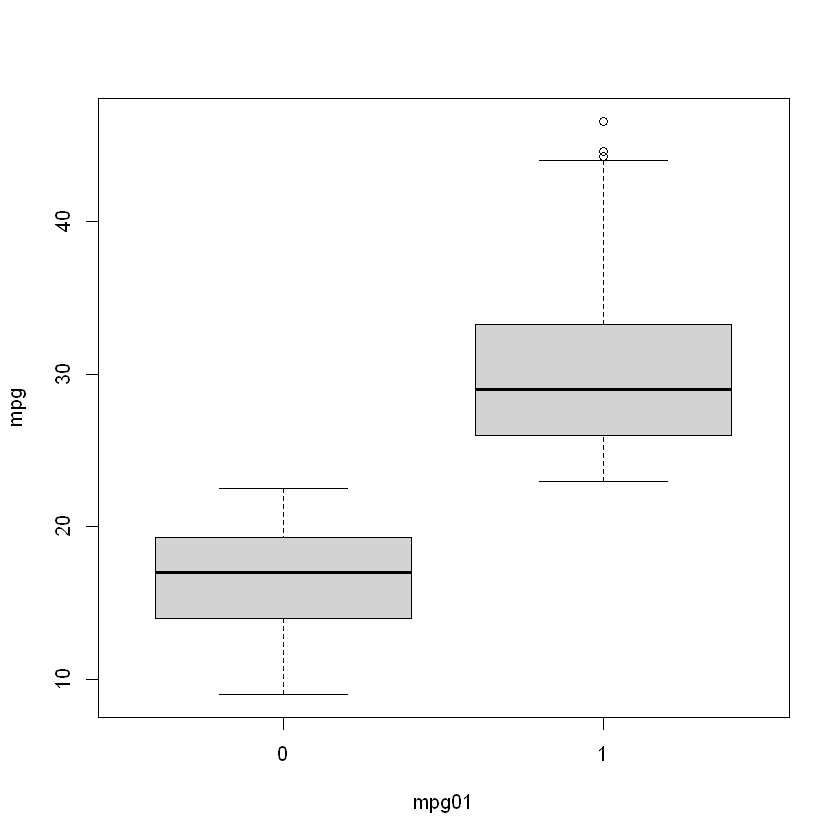

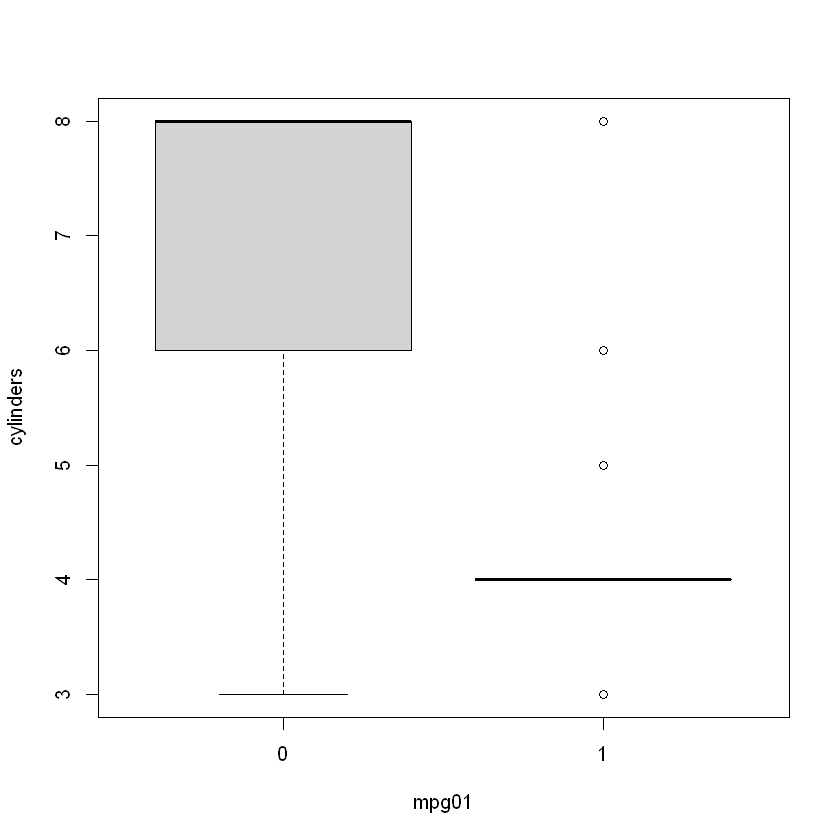

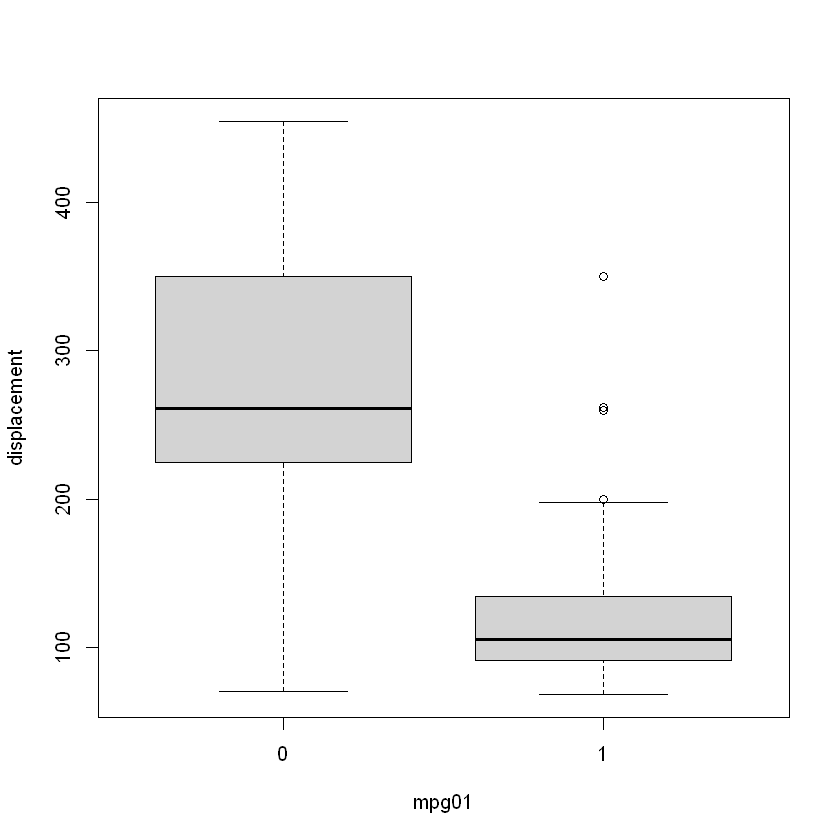

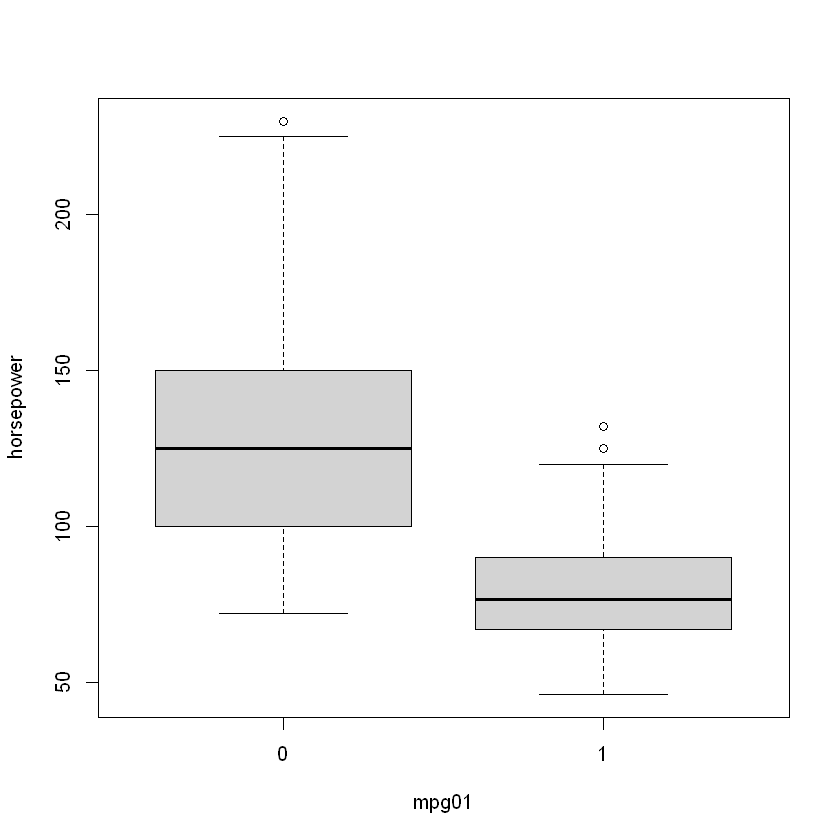

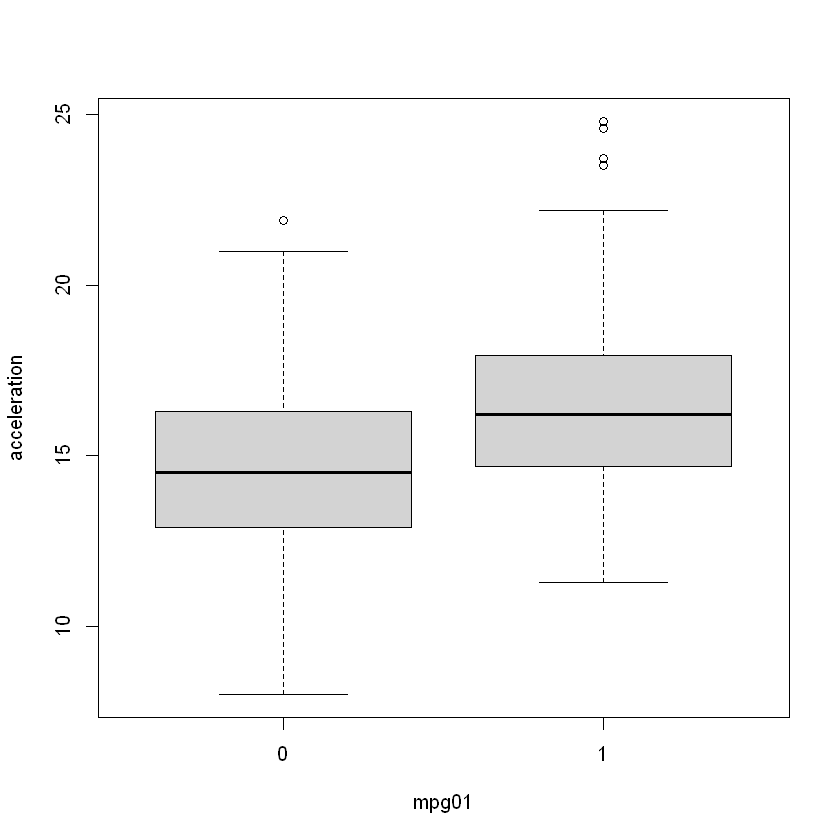

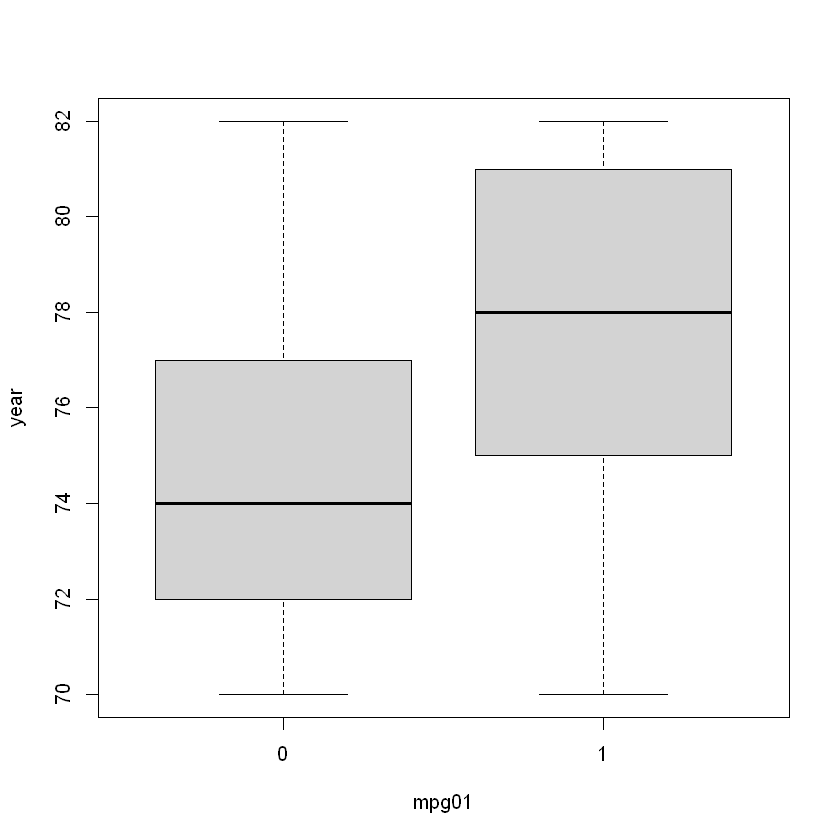

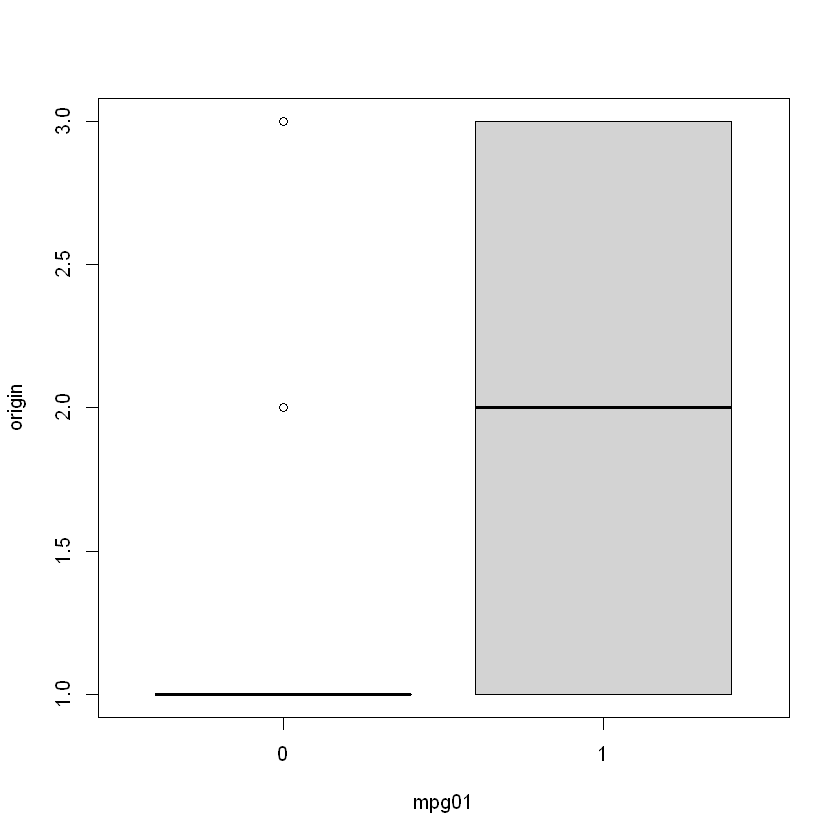

In [205]:
"11b"
cor(Auto_a[,-9])
boxplot(mpg ~ mpg01, data = Auto_a)
boxplot(cylinders ~ mpg01, data = Auto_a)
boxplot(displacement ~ mpg01, data = Auto_a)
boxplot(horsepower ~ mpg01, data = Auto_a)
boxplot(acceleration ~ mpg01, data = Auto_a)
boxplot(year ~ mpg01, data = Auto_a)
boxplot(origin ~ mpg01, data = Auto_a)

mpg01 ist strongly negatively correlated with cylinders (-0.759), displacement (-0.753), horsepower (-0.667) and weight (-0.758). It's strongly positively correlated with mpg (0.837) and the the other mpg01, I'm a bit confused that the correlation with mpg is not 1 since mpg01 comes from mpg. mpg01 is slightly positively correlated with acceleration (0.347) and year (0.43).

In [208]:
"11c"
length <- length(Auto_a$mpg01)
random_sample1 <- sample(1:length, 3/4*length) 
random_sample2 <- (1:length)[-random_sample1]
Auto.train <- Auto_a[random_sample1,] 
Auto.test <- Auto_a[random_sample2,] 
mpg01.test = mpg01[random_sample2]

str(Auto.train)
str(Auto.test)

[1] "11c"

'data.frame':	294 obs. of  16 variables:
 $ mpg         : num  37.3 13 15 27.4 16 13 26.8 18 34 37.7 ...
 $ cylinders   : num  4 8 8 4 6 8 6 6 4 4 ...
 $ displacement: num  91 350 400 121 250 400 173 250 112 89 ...
 $ horsepower  : num  69 165 150 80 100 190 115 88 88 62 ...
 $ weight      : num  2130 4274 3761 2670 3781 ...
 $ acceleration: num  14.7 12 9.5 15 17 12.5 12.9 14.5 18 17.3 ...
 $ year        : num  79 72 70 79 74 72 79 71 82 81 ...
 $ origin      : num  2 1 1 1 1 1 1 1 1 3 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 126 54 57 15 50 75 205 151 46 278 ...
 $ mpg01       : num  1 0 0 1 0 0 1 0 1 1 ...
 $ mpg01.1     : num  1 0 0 1 0 0 1 0 1 1 ...
 $ mpg01.2     : num  1 0 0 1 0 0 1 0 1 1 ...
 $ mpg01.3     : num  1 0 0 1 0 0 1 0 1 1 ...
 $ mpg01.4     : num  1 0 0 1 0 0 1 0 1 1 ...
 $ mpg01.5     : num  1 0 0 1 0 0 1 0 1 1 ...
 $ mpg01.6     : num  1 0 0 1 0 0 1 0 1 1 ...
'data.frame':	98 obs. of  16 variables:
 $ mpg         : num  18 24 18 16 17

In [209]:
"11d"
lda.fit = lda(mpg01~cylinders+weight+displacement+horsepower, data=Auto.train)
lda.pred = predict(lda.fit, Auto.test)
mean(lda.pred$class != mpg01.test)

[1] "11d"

[1] 0.122449

The test error rate is 12%


In [210]:
"11e"
qda.fit = qda(mpg01~cylinders+weight+displacement+horsepower,data=Auto.train)
qda.pred = predict(qda.fit, Auto.test)
mean(qda.pred$class != mpg01.test)

[1] "11e"

[1] 0.1632653

The test error rate is 16%

In [211]:
"11f"
glm.fit = glm(mpg01~cylinders+weight+displacement+horsepower,data=Auto.train, family = binomial)
glm.probs = predict(glm.fit, Auto.test, type="response")
glm.pred = rep(0, length(glm.probs))
glm.pred[glm.probs > 0.5] = 1
mean(glm.pred != mpg01.test)

[1] "11f"

[1] 0.1530612

The test error rate is 15%

In [213]:
"11g"
train.X = as.matrix(Auto_a$cylinders[random_sample1], Auto_a$weight[random_sample1], Auto_a$displacement[random_sample1], Auto_a$horsepower[random_sample1]) 
test.X =  as.matrix(Auto_a$cylinders[random_sample2], Auto_a$weight[random_sample2], Auto_a$displacement[random_sample2], Auto_a$horsepower[random_sample2]) 
train.mpg01 = Auto_a$mpg01[random_sample1]
set.seed(1)

"k=1"
knn.pred = knn(train.X, test.X, train.mpg01, k=1)
mean(knn.pred!=mpg01.test)

"k=10"
knn.pred = knn(train.X, test.X, train.mpg01, k=10)
mean(knn.pred!=mpg01.test)

"k=100"
knn.pred = knn(train.X, test.X, train.mpg01, k=100)
mean(knn.pred!=mpg01.test)

"k=200"
knn.pred = knn(train.X, test.X, train.mpg01, k=200)
mean(knn.pred!=mpg01.test)


[1] "11g"

[1] "k=1"

[1] 0.1326531

[1] "k=10"

[1] 0.1428571

[1] "k=100"

[1] 0.1428571

[1] "k=200"

[1] 0.1428571

The test error rate of K=1 ist 13%, it's lower than the test error rate of k= 10, 100 & 200, which all have the same test error rate (14%). So k=1 seems to perform best.